In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline


## Dataset

In [2]:
df=pd.read_csv("HotelReservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
cat_cols = ["type_of_meal_plan", "room_type_reserved","market_segment_type","booking_status"]
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [4]:
df.drop(['Booking_ID','arrival_year'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20680 entries, 0 to 20679
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          20680 non-null  int64  
 1   no_of_children                        20680 non-null  int64  
 2   no_of_weekend_nights                  20680 non-null  int64  
 3   no_of_week_nights                     20680 non-null  int64  
 4   type_of_meal_plan                     20680 non-null  int64  
 5   required_car_parking_space            20680 non-null  int64  
 6   room_type_reserved                    20680 non-null  int64  
 7   lead_time                             20680 non-null  int64  
 8   arrival_month                         20680 non-null  int64  
 9   arrival_date                          20680 non-null  int64  
 10  market_segment_type                   20680 non-null  int64  
 11  repeated_guest 

In [6]:
X = df.drop("booking_status", axis=1)
y = df["booking_status"].values.reshape(-1, 1)

In [7]:
print(X.shape)
print(y.shape)

(20680, 16)
(20680, 1)


### Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16544, 16)
(4136, 16)
(16544, 1)
(4136, 1)


## Normalisation

In [9]:
def z_score_normalization(data):
   # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [10]:
X_train_norm, mean,std=z_score_normalization(X_train)


In [11]:
X_test_norm= (X_test - mean)/std


## Selectionner le degree

In [12]:
def select_degree(X_train, y_train):

    # Tester les différents degrés
    degrees = range(1, 5)
    cv_scores = []

    for d in degrees:
        # Transformation polynomiale
        poly = PolynomialFeatures(degree=d)
        X_train_poly = poly.fit_transform(X_train)

        # Modèle de classification
        model = LogisticRegression(max_iter=100)

        # Cross validation sur l'accuracy
        scores = cross_val_score(model, X_train_poly, y_train,
                                 cv=5, scoring='accuracy')

        # On stocke l’accuracy moyenne
        cv_scores.append(np.mean(scores))

    # Meilleur degré = accuracy maximale
    optimal_degree = degrees[np.argmax(cv_scores)]

    # Affichage des scores de validation croisée
    plt.figure(figsize=(8, 5))
    plt.plot(degrees, cv_scores, marker='o', label="Accuracy (Validation croisée)")
    plt.axvline(optimal_degree, color='red', linestyle='--',
                label=f"Degré optimal = {optimal_degree}")

    plt.xlabel("Degré du polynôme")
    plt.ylabel("Accuracy")
    plt.title("Sélection du degré optimal (Accuracy avec Validation Croisée)")
    plt.legend()
    plt.show()

    print(f"Degré optimal sélectionné : {optimal_degree}")
    return optimal_degree


c:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

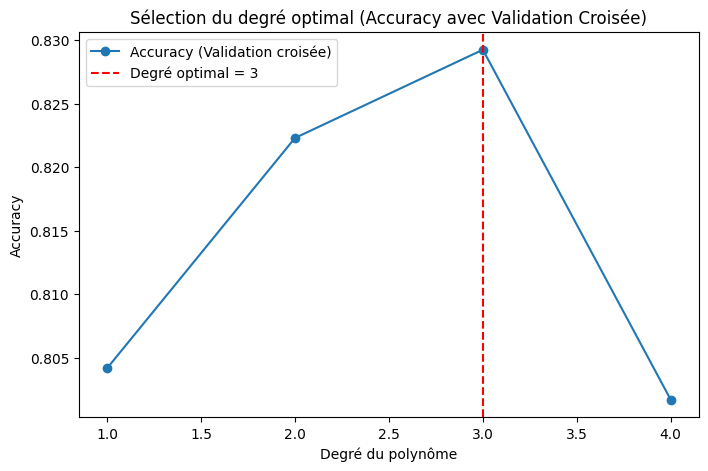

Degré optimal sélectionné : 3


In [13]:
degree = select_degree(X_train_norm, y_train)

In [14]:
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_norm)
X_test_poly = poly.transform(X_test_norm)

print("X_train_poly shape:", X_train_poly.shape)
print("X_test_poly shape:", X_test_poly.shape)

X_train_poly shape: (16544, 968)
X_test_poly shape: (4136, 968)


# Model

In [15]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
def initialisation(X):
    np.random.seed(0)
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [17]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

# Fonction Coût

In [18]:
# def log_loss(y, A):
#     epsilon = 1e-15
#     A = np.clip(A, epsilon, 1 - epsilon)
#     return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


def log_loss_l2(y, A, W, lmbda=0.01):
    """
    y : labels (0/1)
    A : prédictions (probabilités)
    W : poids (sans b)
    lmbda : paramètre de régularisation
    """
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    m = len(y)
    loss = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    l2_term = (lmbda / 2) * np.sum(W**2)  # b n'est pas régularisé
    return loss + l2_term

# Optimisation - Gradient et Descente de Gradient

In [19]:
# def gradients(X, A, y):
#     m = len(y)
#     dW = 1/m * np.dot(X.T, (A - y))
#     db = 1/m * np.sum(A - y)
#     return dW, db

def gradients_l2(X, A, y, W, lmbda=0.01):
    """
    X : features (m, n)
    A : prédictions (m,)
    y : labels (m,)
    W : poids (n,)
    lmbda : régularisation
    """
    m = len(y)
    dW = 1/m * np.dot(X.T, (A - y)) + lmbda * W  # régularisation sur W seulement
    db = 1/m * np.sum(A - y)  # b n'est pas régularisé
    return dW, db

In [20]:
def optimisation(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b


# Prédiction

In [21]:
def predict(X, W, b):
    A = modele(X, W, b)
    return (A >= 0.5).astype(int)

# Modèle final

In [44]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
    # Reshape de y pour éviter les bugs
    y = y.reshape(-1, 1)

    W, b = initialisation(X)
    loss_history = []

    for i in range(n_iter):
        A = modele(X, W, b)
        loss = log_loss_l2(y, A, W)
        loss_history.append(loss)

        dW, db = gradients_l2(X, A, y, W)
        W, b = optimisation(W, b, dW, db, learning_rate)

    # Courbe de perte
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution du Log Loss')
    plt.show()

    return W, b

C:\Users\4B\AppData\Local\Temp\ipykernel_2752\4018128783.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


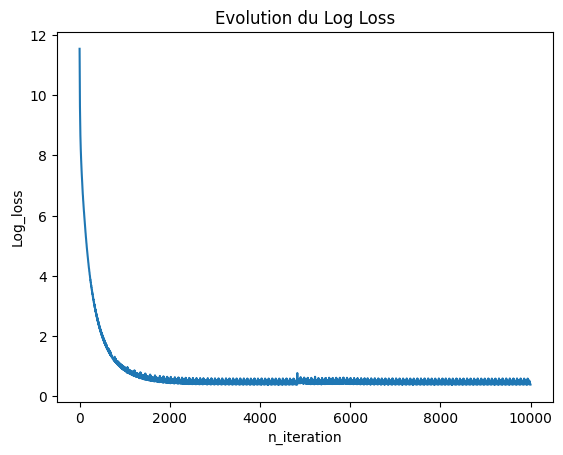

In [45]:
W,b=regression_logistique(X_train_poly, y_train)

In [46]:
y_pred = predict(X_test_poly , W, b)
print("Accuracy=",np.round(accuracy_score(y_test, y_pred)*100),'%')

Accuracy= 84.0 %


In [47]:
y_pred = predict(X_test_poly, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 904  442]
 [ 226 2564]]


In [48]:
W.shape

(968, 1)

In [53]:
# 1) Prendre une ligne de test
x_test = df.drop(columns=['booking_status']).iloc[80].values        # (17,)

# 2) Normaliser le vecteur selon les mean / std du TRAIN
x_test_norm = (x_test - mean) / std                               # (17,)

# 3) Transformer en polynômes avec le même objet poly
x_test_poly = poly.transform(x_test_norm.values.reshape(1, -1))

# 4) Calcul de la probabilité
proba = modele(x_test_poly, W, b)

print("probabilité :", proba)

probabilité : [[0.04281413]]


c:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
import numpy as np

# Définir les mappings manuellement (plus simple)
meal_plan_mapping = {
    'Meal Plan 1': 0,
    'Meal Plan 2': 1,
    'Meal Plan 3': 2,
    'Not Selected': 3
}

room_type_mapping = {
    'Room_Type 1': 0,
    'Room_Type 2': 1,
    'Room_Type 3': 2,
    'Room_Type 4': 3,
    'Room_Type 5': 4,
    'Room_Type 6': 5,
    'Room_Type 7': 6
}

market_segment_mapping = {
    'Aviation': 0,
    'Complementary': 1,
    'Corporate': 2,
    'Offline': 3,
    'Online': 4
}

# ⚠️ La ligne importante :
# X_df = dataframe des features AVANT .values
X_df = df.drop(columns=['booking_status'])
feature_names = X_df.columns.tolist()

# Sauvegarder le modèle
model_data = {
    'W': W,
    'b': b,
    'poly': poly,
    'mean': mean,
    'std': std,
    'feature_names': feature_names,   
    'meal_plan_mapping': meal_plan_mapping,
    'room_type_mapping': room_type_mapping,
    'market_segment_mapping': market_segment_mapping,
}

with open('hotel_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("✅ Modèle sauvegardé avec succès avec mappings manuels !")


✅ Modèle sauvegardé avec succès avec mappings manuels !
